## Section 2

Entry Angle: 34°, Max Y: 86.9248095634579
Entry Angle: 37°, Max Y: 78.41843975453637
Entry Angle: 41°, Max Y: 69.10404169838392
Entry Angle: 46°, Max Y: 59.82883920208679
Entry Angle: 50°, Max Y: 53.77594691537759
Entry Angle: 55°, Max Y: 47.438512901363644
Entry Angle: 60°, Max Y: 42.097711823235805
Entry Angle: 65°, Max Y: 37.46978782323076
Entry Angle: 70°, Max Y: 33.34719352908273
Entry Angle: 75°, Max Y: 29.5723162976143
Entry Angle: 80°, Max Y: 26.02076305457667
Entry Angle: 46°, Max Y: 53.47946158157935
Entry Angle: 50°, Max Y: 48.51512478956611
Entry Angle: 55°, Max Y: 43.33872094392425
Entry Angle: 60°, Max Y: 38.99539824359222
Entry Angle: 65°, Max Y: 35.24646832109332
Entry Angle: 70°, Max Y: 31.917639698900565
Entry Angle: 75°, Max Y: 28.876951731993692
Entry Angle: 80°, Max Y: 26.02076305457667


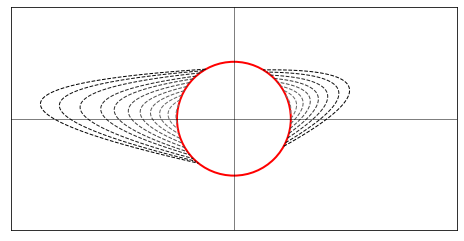

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.cm as cm

# Define parameters
r_circle = 25.5                                                     # tunnel radius R_t

## left spring line
beta_deg = [34, 37 , 41, 46 , 50, 55, 60, 65, 70, 75, 80]           # breakout width (beta) range
beta_deg_list = [2]
t = sp.symbols('t')

cmap = plt.get_cmap('Greys')
num_angles = len(beta_deg)  # Number of entry angles
colors = cmap(np.linspace(1, 0.6, num_angles))  # Create gradient from grey (0.3) to black (1)

# Function to plot the tunnel (circle)
def plot_circle(r, ax):
    circle = plt.Circle((0, 0), r, color='r', fill=False, linestyle='-', linewidth=2)
    ax.add_artist(circle)

# Function to calculate the Bézier curve points with a progressive control point
def bezier_curve(r, theta_deg, alpha_deg, min_factor, max_factor, min_angle, max_angle):
    theta = np.deg2rad(theta_deg)
    
    # Define control points / entry and exit from the tunnel wall
    P0 = np.array([r * np.cos(theta), r * np.sin(theta)])
    P2 = np.array([-r * np.cos(theta), r * np.sin(theta)])
    
    # Scale the control point P1 progressively based on the breakout width
    scaling_factor = (max_factor - min_factor) * (1 - (theta_deg - min_angle) / (max_angle - min_angle)) + min_factor
    P1 = np.array([0, scaling_factor * r / np.sin(theta)])  # Scaled control point based on the angle
    
    # Bézier curve calculation
    B_t = (1 - t)**2 * P0 + 2*t*(1 - t) * P1 + t**2 * P2
    B_t_func = sp.lambdify(t, B_t, modules=['numpy'])
    t_vals = np.linspace(0, 1, 100)
    B_t_vals = np.array([B_t_func(tv) for tv in t_vals])
    
    return B_t_vals[:, 0], B_t_vals[:, 1]

# Function to rotate points by an angle 'rota'
def rotate_points(x, y, rota):
    rota = np.deg2rad(rota)
    x_new = x * np.cos(rota) - y * np.sin(rota)
    y_new = x * np.sin(rota) + y * np.cos(rota)
    return x_new, y_new

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the circle
plot_circle(r_circle, ax)

# Define damage scaling factors (zeta) for P1
min_factor = 1.04  # Smaller control point for larger angles
max_factor = 3.5  # Larger control point for smaller angles
min_angle = min(beta_deg)
max_angle = max(beta_deg)

# Plot the Bézier curves for left springline 
for idx, angle in enumerate(beta_deg):
    for alpha in beta_deg_list:
        x_vals, y_vals = bezier_curve(r_circle, angle, alpha, min_factor, max_factor, min_angle, max_angle)
        # ax.plot(x_vals, y_vals, label=f'Entry Angle {angle}°')
        max_y = np.max(y_vals)
        print(f'Entry Angle: {angle}°, Max Y: {max_y}')
        
        # Use color based on the entry angle index
        angle_color = colors[idx]
        
        # Rotate the curves to other quadrants (if needed)
        for rotation_angle in [360-274.5]:                                      # rotation angle here
            x_rot, y_rot = rotate_points(x_vals, y_vals, rotation_angle)
            ax.plot(x_rot, y_rot, linestyle='dashed', lw=1, color=angle_color)  # Use the same color for the rotated curve


## right spring line

beta_deg = [46, 50, 55, 60, 65, 70, 75, 80]                                     # breakout width (beta) range
beta_deg_list = [2]
t = sp.symbols('t')

cmap = plt.get_cmap('Greys')
num_angles = len(beta_deg)  # Number of entry angles
colors = cmap(np.linspace(1, 0.6, num_angles))  # Create gradient from grey (0.3) to black (1)


# Function to plot the circle
def plot_circle(r, ax):
    circle = plt.Circle((0, 0), r, color='r', fill=False, linestyle='-', linewidth=2)
    ax.add_artist(circle)

# Function to calculate the Bézier curve points with a progressive control point
def bezier_curve(r, theta_deg, alpha_deg, min_factor, max_factor, min_angle, max_angle):
    theta = np.deg2rad(theta_deg)
    
    # Define control points
    P0 = np.array([r * np.cos(theta), r * np.sin(theta)])
    P2 = np.array([-r * np.cos(theta), r * np.sin(theta)])
    
    # Scale the control point P1 progressively based on the entry angle
    scaling_factor = (max_factor - min_factor) * (1 - (theta_deg - min_angle) / (max_angle - min_angle)) + min_factor
    P1 = np.array([0, scaling_factor * r / np.sin(theta)])  # Scaled control point based on the angle
    
    # Bézier curve calculation
    B_t = (1 - t)**2 * P0 + 2*t*(1 - t) * P1 + t**2 * P2
    B_t_func = sp.lambdify(t, B_t, modules=['numpy'])
    t_vals = np.linspace(0, 1, 100)
    B_t_vals = np.array([B_t_func(tv) for tv in t_vals])
    
    return B_t_vals[:, 0], B_t_vals[:, 1]

# Function to rotate points by an angle 'rota'
def rotate_points(x, y, rota):
    rota = np.deg2rad(rota)
    x_new = x * np.cos(rota) - y * np.sin(rota)
    y_new = x * np.sin(rota) + y * np.cos(rota)
    return x_new, y_new


# Define damage scaling factors (zeta) for P1
min_factor = 1.04  # Smaller control point for larger angles
max_factor = 2.5  # Larger control point for smaller angles
min_angle = min(beta_deg)
max_angle = max(beta_deg)


# Plot the Bézier curves for right springline
for idx, angle in enumerate(beta_deg):
    for alpha in beta_deg_list:
        x_vals, y_vals = bezier_curve(r_circle, angle, alpha, min_factor, max_factor, min_angle, max_angle)
        # ax.plot(x_vals, y_vals, label=f'Entry Angle {angle}°')
        max_y = np.max(y_vals)
        print(f'Entry Angle: {angle}°, Max Y: {max_y}')
        
        # Use color based on the entry angle index
        angle_color = colors[idx]
        
        # Rotate the curves to other quadrants (if needed)
        for rotation_angle in [285]:                                            # rotation angle here
            x_rot, y_rot = rotate_points(x_vals, y_vals, rotation_angle)
            ax.plot(x_rot, y_rot, linestyle='dashed', lw=1, color=angle_color)  # Use the same color for the rotated curve


# Formatting the plot
ax.set_aspect('equal')
ax.set_xlim(-100, 100)
ax.set_ylim(-50, 50)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels
ax.grid(False)     # Ensure grid is turned off


plt.grid(False)
plt.savefig('Section2.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


## Section 3

Entry Angle: 46°, Max Y: 83.60818305753156
Entry Angle: 50°, Max Y: 73.47849191568605
Entry Angle: 55°, Max Y: 62.7928308390554
Entry Angle: 60°, Max Y: 53.716327972241125
Entry Angle: 65°, Max Y: 45.79644314312915
Entry Angle: 70°, Max Y: 38.701080810566054
Entry Angle: 75°, Max Y: 32.176557862547725
Entry Angle: 80°, Max Y: 26.02076305457667
Entry Angle: 50°, Max Y: 48.045226114250774
Entry Angle: 55°, Max Y: 42.97252593413373
Entry Angle: 60°, Max Y: 38.7182983898765
Entry Angle: 65°, Max Y: 35.047880559737344
Entry Angle: 70°, Max Y: 31.789951395622147
Entry Angle: 75°, Max Y: 28.81484149894797
Entry Angle: 80°, Max Y: 26.02076305457667


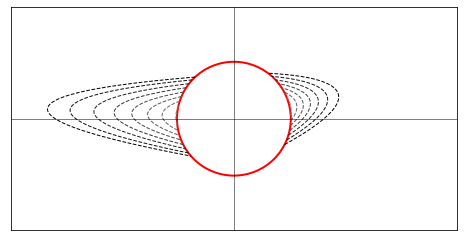

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.cm as cm

# Define parameters
r_circle = 25.5                                                     # tunnel radius R_t


## left spring line
beta_deg = [46 , 50, 55, 60, 65, 70, 75, 80]         # breakout width (beta) range
beta_deg_list = [2]
t = sp.symbols('t')

cmap = plt.get_cmap('Greys')
num_angles = len(beta_deg)  # Number of entry angles
colors = cmap(np.linspace(1, 0.6, num_angles))  # Create gradient from grey (0.3) to black (1)

# Function to plot the tunnel (circle)
def plot_circle(r, ax):
    circle = plt.Circle((0, 0), r, color='r', fill=False, linestyle='-', linewidth=2)
    ax.add_artist(circle)

# Function to calculate the Bézier curve points with a progressive control point
def bezier_curve(r, theta_deg, alpha_deg, min_factor, max_factor, min_angle, max_angle):
    theta = np.deg2rad(theta_deg)
    
    # Define control points / entry and exit from the tunnel wall
    P0 = np.array([r * np.cos(theta), r * np.sin(theta)])
    P2 = np.array([-r * np.cos(theta), r * np.sin(theta)])
    
    # Scale the control point P1 progressively based on the breakout width
    scaling_factor = (max_factor - min_factor) * (1 - (theta_deg - min_angle) / (max_angle - min_angle)) + min_factor
    P1 = np.array([0, scaling_factor * r / np.sin(theta)])  # Scaled control point based on the angle
    
    # Bézier curve calculation
    B_t = (1 - t)**2 * P0 + 2*t*(1 - t) * P1 + t**2 * P2
    B_t_func = sp.lambdify(t, B_t, modules=['numpy'])
    t_vals = np.linspace(0, 1, 100)
    B_t_vals = np.array([B_t_func(tv) for tv in t_vals])
    
    return B_t_vals[:, 0], B_t_vals[:, 1]

# Function to rotate points by an angle 'rota'
def rotate_points(x, y, rota):
    rota = np.deg2rad(rota)
    x_new = x * np.cos(rota) - y * np.sin(rota)
    y_new = x * np.sin(rota) + y * np.cos(rota)
    return x_new, y_new

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the circle
plot_circle(r_circle, ax)

# Define damage scaling factors (zeta) for P1
min_factor = 1.04  # Smaller control point for larger angles
max_factor = 4.2  # Larger control point for smaller angles
min_angle = min(beta_deg)
max_angle = max(beta_deg)

# Plot the Bézier curves for left springline 
for idx, angle in enumerate(beta_deg):
    for alpha in beta_deg_list:
        x_vals, y_vals = bezier_curve(r_circle, angle, alpha, min_factor, max_factor, min_angle, max_angle)
        # ax.plot(x_vals, y_vals, label=f'Entry Angle {angle}°')
        max_y = np.max(y_vals)
        print(f'Entry Angle: {angle}°, Max Y: {max_y}')
        
        # Use color based on the entry angle index
        angle_color = colors[idx]
        
        # Rotate the curves to other quadrants (if needed)
        for rotation_angle in [360-273]:                                      # rotation angle here
            x_rot, y_rot = rotate_points(x_vals, y_vals, rotation_angle)
            ax.plot(x_rot, y_rot, linestyle='dashed', lw=1, color=angle_color)  # Use the same color for the rotated curve


## right spring line

beta_deg = [50, 55, 60, 65, 70, 75, 80]  # Example angles from your plot
beta_deg_list = [2]
t = sp.symbols('t')

cmap = plt.get_cmap('Greys')
num_angles = len(beta_deg)  # Number of entry angles
colors = cmap(np.linspace(1, 0.6, num_angles))  # Create gradient from grey (0.3) to black (1)


# Function to plot the circle
def plot_circle(r, ax):
    circle = plt.Circle((0, 0), r, color='r', fill=False, linestyle='-', linewidth=2)
    ax.add_artist(circle)

# Function to calculate the Bézier curve points with a progressive control point
def bezier_curve(r, theta_deg, alpha_deg, min_factor, max_factor, min_angle, max_angle):
    theta = np.deg2rad(theta_deg)
    
    # Define control points
    P0 = np.array([r * np.cos(theta), r * np.sin(theta)])
    P2 = np.array([-r * np.cos(theta), r * np.sin(theta)])
    
    # Scale the control point P1 progressively based on the entry angle
    scaling_factor = (max_factor - min_factor) * (1 - (theta_deg - min_angle) / (max_angle - min_angle)) + min_factor
    P1 = np.array([0, scaling_factor * r / np.sin(theta)])  # Scaled control point based on the angle
    
    # Bézier curve calculation
    B_t = (1 - t)**2 * P0 + 2*t*(1 - t) * P1 + t**2 * P2
    B_t_func = sp.lambdify(t, B_t, modules=['numpy'])
    t_vals = np.linspace(0, 1, 100)
    B_t_vals = np.array([B_t_func(tv) for tv in t_vals])
    
    return B_t_vals[:, 0], B_t_vals[:, 1]

# Function to rotate points by an angle 'rota'
def rotate_points(x, y, rota):
    rota = np.deg2rad(rota)
    x_new = x * np.cos(rota) - y * np.sin(rota)
    y_new = x * np.sin(rota) + y * np.cos(rota)
    return x_new, y_new


# Define damage scaling factors (zeta) for P1
min_factor = 1.04  # Smaller control point for larger angles
max_factor = 2.3  # Larger control point for smaller angles
min_angle = min(beta_deg)
max_angle = max(beta_deg)


# Plot the Bézier curves for right springline
for idx, angle in enumerate(beta_deg):
    for alpha in beta_deg_list:
        x_vals, y_vals = bezier_curve(r_circle, angle, alpha, min_factor, max_factor, min_angle, max_angle)
        # ax.plot(x_vals, y_vals, label=f'Entry Angle {angle}°')
        max_y = np.max(y_vals)
        print(f'Entry Angle: {angle}°, Max Y: {max_y}')
        
        # Use color based on the entry angle index
        angle_color = colors[idx]
        
        # Rotate the curves to other quadrants (if needed)
        for rotation_angle in [283]:                                            # rotation angle here
            x_rot, y_rot = rotate_points(x_vals, y_vals, rotation_angle)        
            ax.plot(x_rot, y_rot, linestyle='dashed', lw=1, color=angle_color)  # Use the same color for the rotated curve

# Formatting the plot
ax.set_aspect('equal')
ax.set_xlim(-100, 100)
ax.set_ylim(-50, 50)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels
ax.grid(False)     # Ensure grid is turned off


plt.grid(False)
plt.savefig('Section3.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
